In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\Haccrboi\Desktop\Datasets\canberra.csv')

In [6]:
data.head()

,Date\tTime\tWind dir\tWind spd\tWind gust\tTmp\tDew pt\tFeels like\trh\tFire\tRain\tRain 10'\tPres
0,01/01/2013\tWed 00:00 EDT\tWNW\t9\t9\t19.6\t0....
1,01/01/2013\tTue 23:30 EDT\tWNW\t-\t13\t20.7\t0...
2,01/01/2013\tTue 23:00 EDT\tW\t9\t11\t22.8\t0.9...
3,01/01/2013\tTue 22:30 EDT\tWNW\t11\t13\t22.6\t...
4,01/01/2013\tTue 22:00 EDT\tWNW\t15\t19\t23.9\t...


In [9]:
weather_observations = pd.read_csv(r'C:\Users\Haccrboi\Desktop\Datasets\canberra.csv',
                                   sep='\t',
                                   parse_dates={'Datetime': ['Date', 'Time']},
                                   dayfirst=True,
                                   infer_datetime_format=True, #turn into a 'DATETIME' column
                                   na_values=['-']
                                   )

weather_observations.head()

C:\Anaconda\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
C:\Anaconda\lib\site-packages\dateutil\parser\_parser.py:1218: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


,Datetime,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
0,2013-01-01 00:00:00,WNW,9.0,9.0,19.6,0.1,19.6,27.0,12.0,0.0,0.0,1011.4
1,2013-01-01 23:30:00,WNW,NaN,13.0,20.7,0.7,20.7,26.0,13.0,0.0,0.0,1011.1
2,2013-01-01 23:00:00,W,9.0,11.0,22.8,0.9,22.8,23.0,15.0,0.0,0.0,1011.0
3,2013-01-01 22:30:00,WNW,11.0,13.0,22.6,-1.0,22.6,21.0,17.0,0.0,0.0,1011.0
4,2013-01-01 22:00:00,WNW,15.0,19.0,23.9,-2.2,23.9,18.0,21.0,0.0,0.0,1011.1


In [11]:
#sort the data according to the DATETIME column

sorted_dataframe = weather_observations.sort_values('Datetime')
sorted_dataframe.head()

,Datetime,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
0,2013-01-01 00:00:00,WNW,9.0,9.0,19.6,0.1,19.6,27.0,12.0,0.0,0.0,1011.4
50,2013-01-01 00:00:00,ENE,2.0,6.0,15.9,3.7,15.9,44.0,5.0,0.0,0.0,1014.1
49,2013-01-01 00:30:00,NaN,0.0,0.0,14.5,4.7,14.5,52.0,3.0,0.0,0.0,1014.0
48,2013-01-01 01:00:00,NaN,0.0,0.0,12.8,4.6,12.8,57.0,3.0,0.0,0.0,1013.5
47,2013-01-01 01:30:00,SSW,6.0,9.0,13.3,5.9,13.3,61.0,3.0,0.0,0.0,1013.4


In [12]:
no_duplicates = sorted_dataframe.drop_duplicates('Datetime', keep='last') #drop a duplicate times of same date

indexed_weather_observations = sorted_dataframe.set_index('Datetime') #change index to DATETIME

indexed_weather_observations.head()

,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
Datetime,,,,,,,,,,,
2013-01-01 00:00:00,WNW,9.0,9.0,19.6,0.1,19.6,27.0,12.0,0.0,0.0,1011.4
2013-01-01 00:00:00,ENE,2.0,6.0,15.9,3.7,15.9,44.0,5.0,0.0,0.0,1014.1
2013-01-01 00:30:00,NaN,0.0,0.0,14.5,4.7,14.5,52.0,3.0,0.0,0.0,1014.0
2013-01-01 01:00:00,NaN,0.0,0.0,12.8,4.6,12.8,57.0,3.0,0.0,0.0,1013.5
2013-01-01 01:30:00,SSW,6.0,9.0,13.3,5.9,13.3,61.0,3.0,0.0,0.0,1013.4


In [15]:
#Assigning degrees to wind direction

wind_directions = {
     'N':   0. , 'NNE':  22.5, 'NE':  45. , 'ENE':  67.5 ,
     'E':  90. , 'ESE': 112.5, 'SE': 135. , 'SSE': 157.5 ,
     'S': 180. , 'SSW': 202.5, 'SW': 225. , 'WSW': 247.5 ,
     'W': 270. , 'WNW': 292.5, 'NW': 315. , 'NNW': 337.5 } #Python dictionary

In [16]:
indexed_weather_observations['Wind dir'] = indexed_weather_observations['Wind dir'].apply(wind_directions.get)
indexed_weather_observations.head()

,Wind dir,Wind spd,Wind gust,Tmp,Dew pt,Feels like,rh,Fire,Rain,Rain 10',Pres
Datetime,,,,,,,,,,,
2013-01-01 00:00:00,292.5,9.0,9.0,19.6,0.1,19.6,27.0,12.0,0.0,0.0,1011.4
2013-01-01 00:00:00,67.5,2.0,6.0,15.9,3.7,15.9,44.0,5.0,0.0,0.0,1014.1
2013-01-01 00:30:00,NaN,0.0,0.0,14.5,4.7,14.5,52.0,3.0,0.0,0.0,1014.0
2013-01-01 01:00:00,NaN,0.0,0.0,12.8,4.6,12.8,57.0,3.0,0.0,0.0,1013.5
2013-01-01 01:30:00,202.5,6.0,9.0,13.3,5.9,13.3,61.0,3.0,0.0,0.0,1013.4


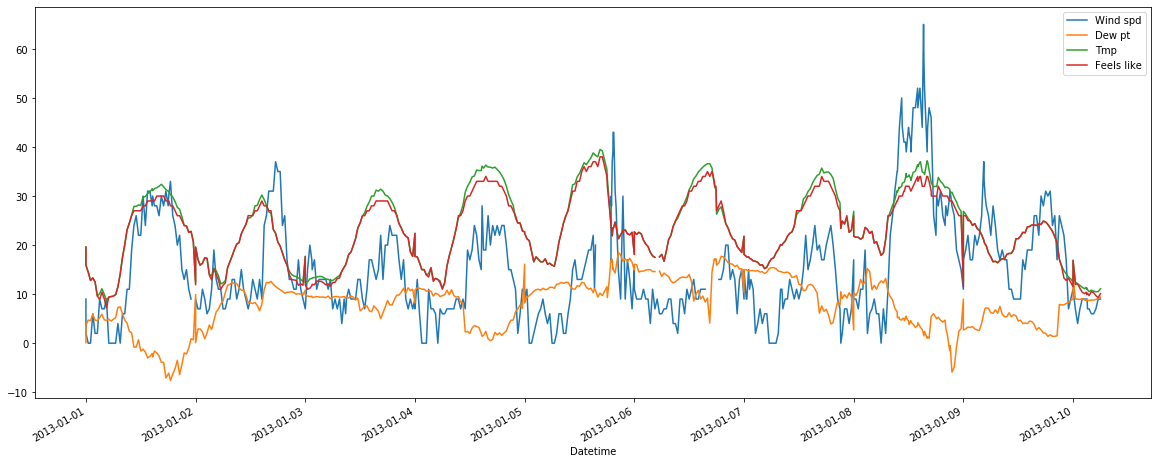

In [30]:
indexed_weather_observations[['Wind spd','Dew pt', 'Tmp', 'Feels like']][:500].plot(figsize=(20,8))

In [36]:
#regular_observations = indexed_weather_observations.asfreq('30min')